<a href="https://colab.research.google.com/github/LifeofAGeek/100-days-of-Applied-AI/blob/master/Low_Pass_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Ideal LPS**

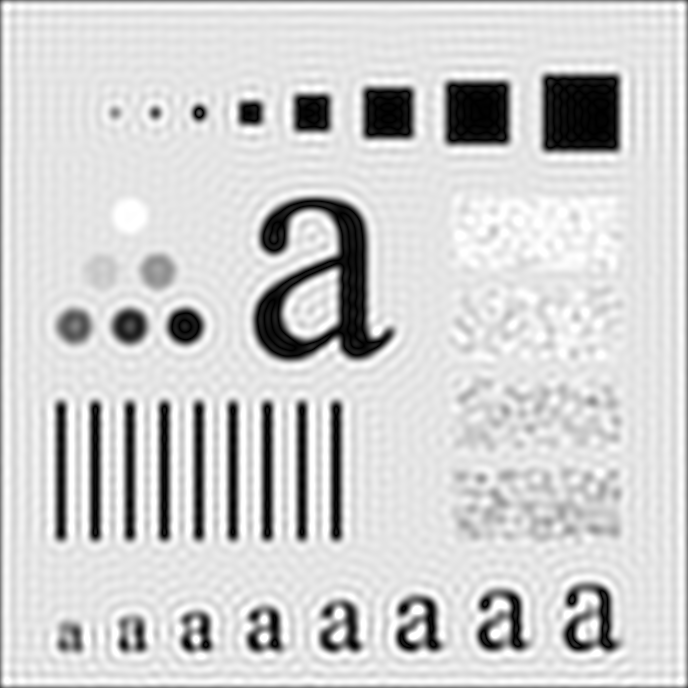

-1

In [14]:
#Ideal Low Pass Filter
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def convert_2d(r):
    r_ext = np.zeros((r.shape[0] * 2, r.shape[1] * 2))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r_ext[i][j] = r[i][j]
         # Fourier transform
    r_ext_fu = np.fft.fft2(r_ext)
         # Move the low-frequency signal to the middle, which is equivalent to multiplying f(x,y) by (-1)^(m+n) in the time domain
    r_ext_fu = np.fft.fftshift(r_ext_fu)

         # Cut-off frequency 
    d0 = 100
         # Frequency domain center coordinates
    center = (r_ext_fu.shape[0] // 2, r_ext_fu.shape[1] // 2)
    h = np.empty(r_ext_fu.shape)
         # Draw filter
    for u in range(h.shape[0]):
        for v in range(h.shape[1]):
            duv = ((u - center[0]) ** 2 + (v - center[1]) ** 2) ** 0.5
            h[u][v] = duv < d0

    s_ext_fu = r_ext_fu * h
    s_ext = np.fft.ifft2(np.fft.ifftshift(s_ext_fu))
    s_ext = np.abs(s_ext)
    s = s_ext[0:r.shape[0], 0:r.shape[1]]

    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            s[i][j] = min(max(s[i][j], 0), 255)
    return s.astype(np.uint8)

def convert_3d(r):
    s_dsplit = []
    for d in range(r.shape[2]):
        rr = r[:, :, d]
        ss = convert_2d(rr)
        s_dsplit.append(ss)
    s = np.dstack(s_dsplit)
    return s

im = cv2.imread('/content/input.tif')
im_converted_mat = convert_3d(im)
cv2_imshow(im_converted_mat)
cv2.waitKey()



2. **Butterworth LPS**

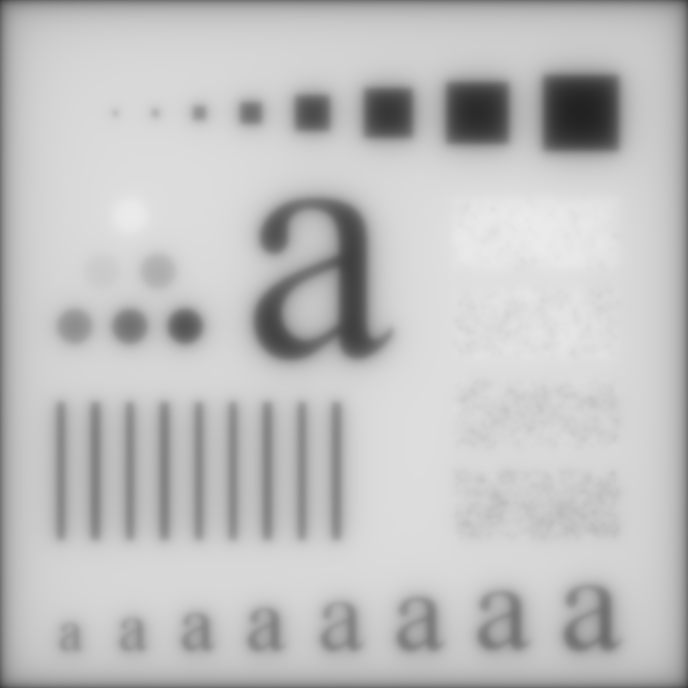

-1

In [15]:
#Butterworth Low Pass Filter
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def convert_2d(r):
    r_ext = np.zeros((r.shape[0] * 2, r.shape[1] * 2))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r_ext[i][j] = r[i][j]
         # Fourier transform
    r_ext_fu = np.fft.fft2(r_ext)
         # Move the low-frequency signal to the middle, which is equivalent to multiplying f(x,y) by (-1)^(m+n) in the time domain
    r_ext_fu = np.fft.fftshift(r_ext_fu)

         # Cut-off frequency 
    d0 = 100
    n = 2
         # Frequency domain center coordinates
    center = (r_ext_fu.shape[0] // 2, r_ext_fu.shape[1] // 2)
    h = np.empty(r_ext_fu.shape)
         # Draw filter
    for u in range(h.shape[0]):
        for v in range(h.shape[1]):
            duv = ((u - center[0]) ** 2 + (v - center[1]) ** 2) ** 0.5
            h[u][v] = 1 / ((1 + (duv / d0)) ** (2 * n))

    s_ext_fu = r_ext_fu * h
    s_ext = np.fft.ifft2(np.fft.ifftshift(s_ext_fu))
    s_ext = np.abs(s_ext)
    s = s_ext[0:r.shape[0], 0:r.shape[1]]

    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            s[i][j] = min(max(s[i][j], 0), 255)
    return s.astype(np.uint8)


def convert_3d(r):
    s_dsplit = []
    for d in range(r.shape[2]):
        rr = r[:, :, d]
        ss = convert_2d(rr)
        s_dsplit.append(ss)
    s = np.dstack(s_dsplit)
    return s

im = cv2.imread('/content/input.tif')
im_converted_mat = convert_3d(im)
cv2_imshow(im_converted_mat)
cv2.waitKey()


3. **Gaussian LPS**

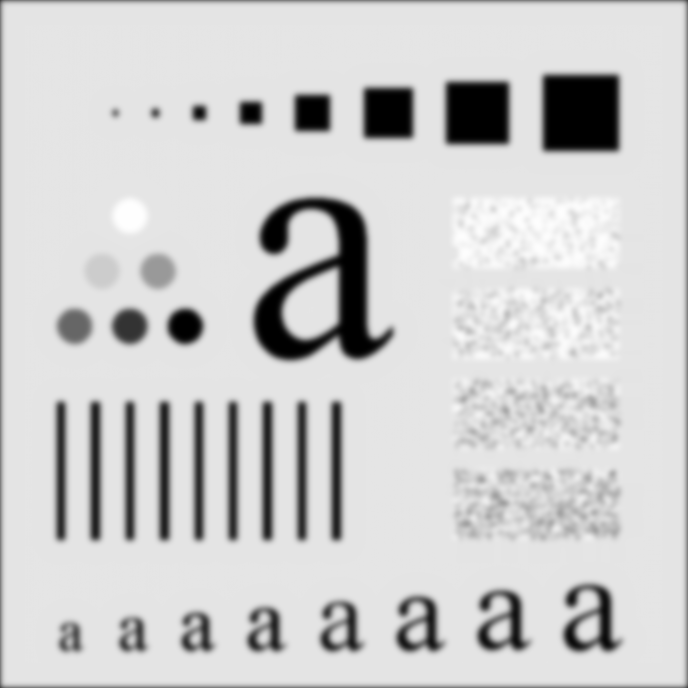

-1

In [16]:
#Gaussian Low Pass Filter
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def convert_2d(r):
    r_ext = np.zeros((r.shape[0] * 2, r.shape[1] * 2))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r_ext[i][j] = r[i][j]
         # Fourier transform
    r_ext_fu = np.fft.fft2(r_ext)
         # Move the low-frequency signal to the middle, which is equivalent to multiplying f(x,y) by (-1)^(m+n) in the time domain
    r_ext_fu = np.fft.fftshift(r_ext_fu)

         # Cut-off frequency 
    d0 = 100
         # Frequency domain center coordinates
    center = (r_ext_fu.shape[0] // 2, r_ext_fu.shape[1] // 2)
    h = np.empty(r_ext_fu.shape)
         # Draw filter
    for u in range(h.shape[0]):
        for v in range(h.shape[1]):
            duv = ((u - center[0]) ** 2 + (v - center[1]) ** 2) ** 0.5
            h[u][v] = np.e ** (-duv ** 2 / d0 ** 2)

    s_ext_fu = r_ext_fu * h
    s_ext = np.fft.ifft2(np.fft.ifftshift(s_ext_fu))
    s_ext = np.abs(s_ext)
    s = s_ext[0:r.shape[0], 0:r.shape[1]]

    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            s[i][j] = min(max(s[i][j], 0), 255)
    return s.astype(np.uint8)

def convert_3d(r):
    s_dsplit = []
    for d in range(r.shape[2]):
        rr = r[:, :, d]
        ss = convert_2d(rr)
        s_dsplit.append(ss)
    s = np.dstack(s_dsplit)
    return s


im = cv2.imread('/content/input.tif')
im_converted_mat = convert_3d(im)
cv2_imshow(im_converted_mat)
cv2.waitKey()